# संभाव्यता आणि सांख्यिकीची ओळख  
या नोटबुकमध्ये, आपण यापूर्वी चर्चा केलेल्या काही संकल्पनांशी थोडेसे प्रयोग करू. संभाव्यता आणि सांख्यिकीमधील अनेक संकल्पना डेटाच्या प्रक्रियेसाठी Python मधील प्रमुख लायब्ररींमध्ये चांगल्या प्रकारे सादर केल्या जातात, जसे की `numpy` आणि `pandas`.  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## रँडम व्हेरिएबल्स आणि वितरणे  
चला 0 ते 9 पर्यंतच्या युनिफॉर्म वितरणातून 30 मूल्यांचे नमुने काढण्यापासून सुरुवात करूया. आपण याचा सरासरी (mean) आणि विचलन (variance) देखील मोजू.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


नमुन्यात किती वेगवेगळ्या मूल्ये आहेत याचा दृश्यमान अंदाज घेण्यासाठी, आपण **हिस्टोग्राम** प्लॉट करू शकतो:


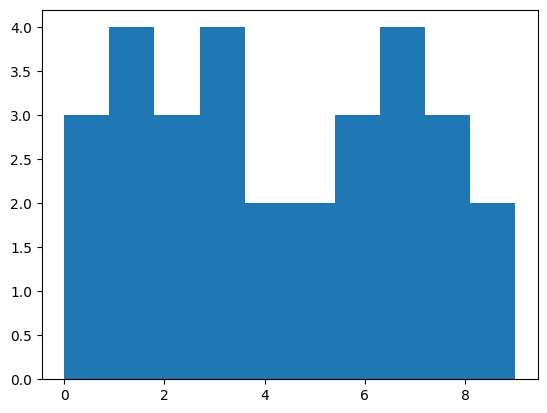

In [119]:
plt.hist(sample)
plt.show()

## वास्तविक डेटा विश्लेषण

वास्तविक जगातील डेटा विश्लेषण करताना सरासरी (mean) आणि विचलन (variance) खूप महत्त्वाचे असतात. चला बेसबॉल खेळाडूंबद्दलचा डेटा [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) येथून लोड करूया.


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


आम्ही येथे डेटा विश्लेषणासाठी [**Pandas**](https://pandas.pydata.org/) नावाचे पॅकेज वापरत आहोत. या कोर्समध्ये पुढे Pandas आणि Python मध्ये डेटा हाताळण्याबद्दल अधिक चर्चा करू.

चला वय, उंची आणि वजनासाठी सरासरी मूल्ये गणना करू:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

आता उंचीवर लक्ष केंद्रित करूया आणि प्रमाणित विचलन आणि वैविध्य मोजूया:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


म्हणाच्या व्यतिरिक्त, मध्यम मूल्य आणि चतुर्थांश पाहणे योग्य ठरेल. त्यांना **बॉक्स प्लॉट** च्या मदतीने दृश्यरूप दिले जाऊ शकते:


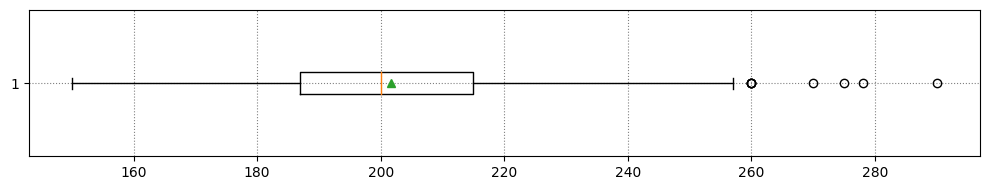

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

आम्ही आमच्या डेटासेटच्या उपसंचांचे बॉक्स प्लॉट्स देखील तयार करू शकतो, उदाहरणार्थ, खेळाडूच्या भूमिकेनुसार गटबद्ध केलेले.


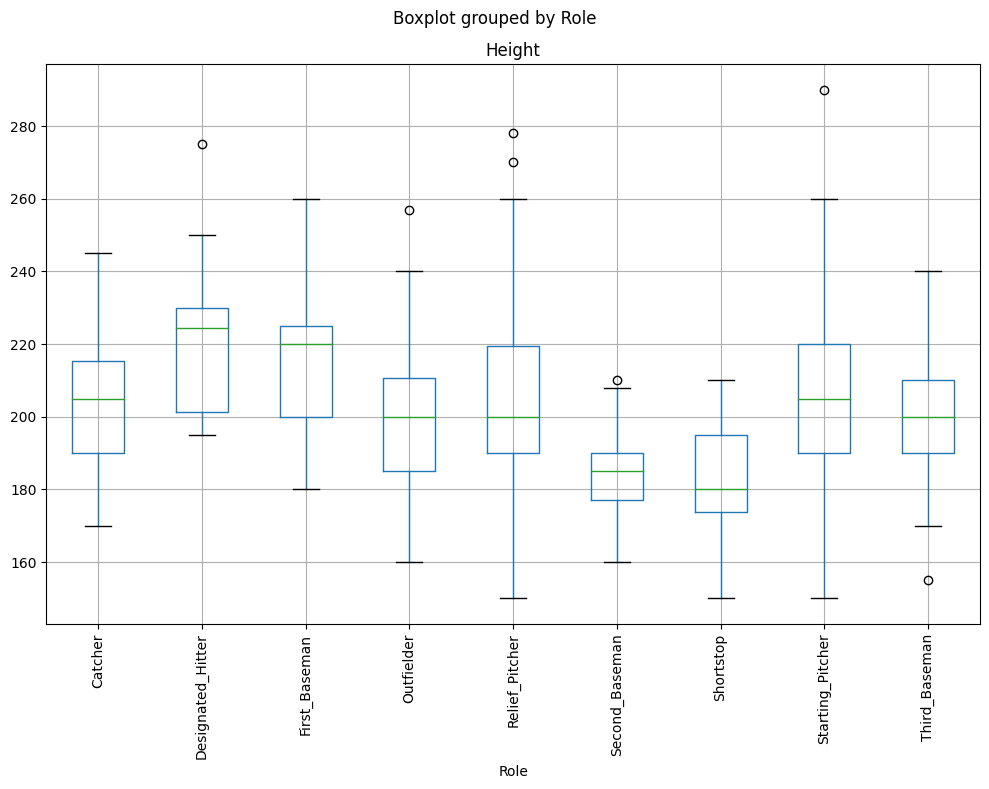

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Note**: या आकृतीनुसार, सरासरीने पहिले बेसमनचे उंची दुसऱ्या बेसमनच्या उंचीपेक्षा जास्त असते. नंतर आपण शिकू की ही गृहितक अधिक औपचारिकपणे कशी तपासता येईल आणि आपले डेटा सांख्यिकदृष्ट्या महत्त्वपूर्ण असल्याचे कसे दाखवता येईल.  

वय, उंची आणि वजन हे सर्व सातत्यपूर्ण यादृच्छिक चल आहेत. तुम्हाला त्यांचे वितरण काय वाटते? हे शोधण्याचा एक चांगला मार्ग म्हणजे मूल्यांचे हिस्टोग्राम तयार करणे:


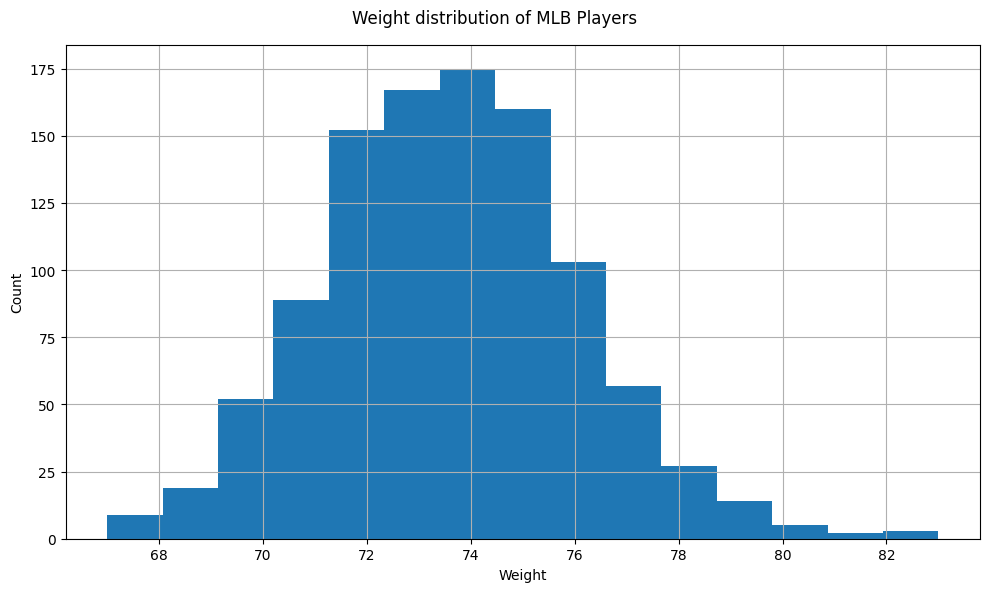

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## सामान्य वितरण

चला वजनांचे एक कृत्रिम नमुना तयार करूया, जो आपल्या वास्तविक डेटासारख्याच सरासरी आणि विचलनासह सामान्य वितरणाचे अनुसरण करतो:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

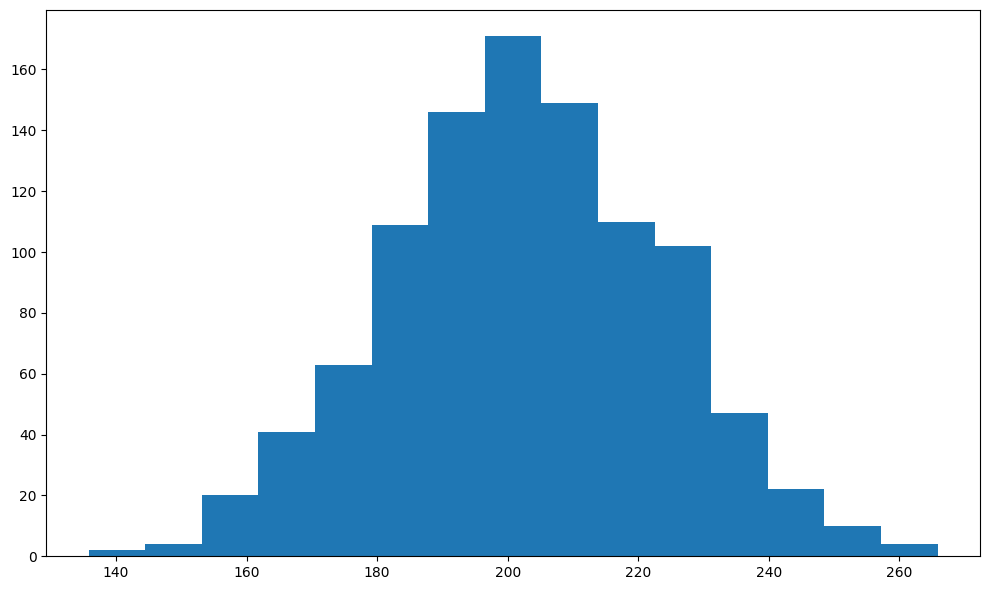

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

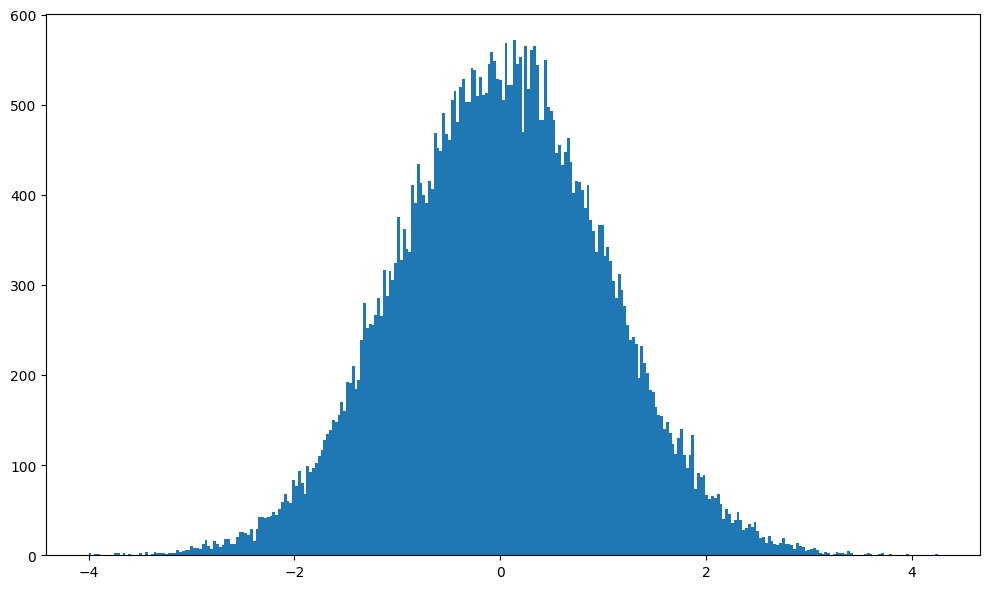

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

वास्तविक जीवनातील बहुतेक मूल्ये सामान्य वितरणात असतात, त्यामुळे नमुना डेटा तयार करण्यासाठी आपल्याला एकसमान यादृच्छिक संख्या जनरेटर वापरू नये. जर आपण एकसमान वितरणासह वजन तयार करण्याचा प्रयत्न केला (जो `np.random.rand` द्वारे तयार केला जातो) तर काय होते ते येथे आहे:


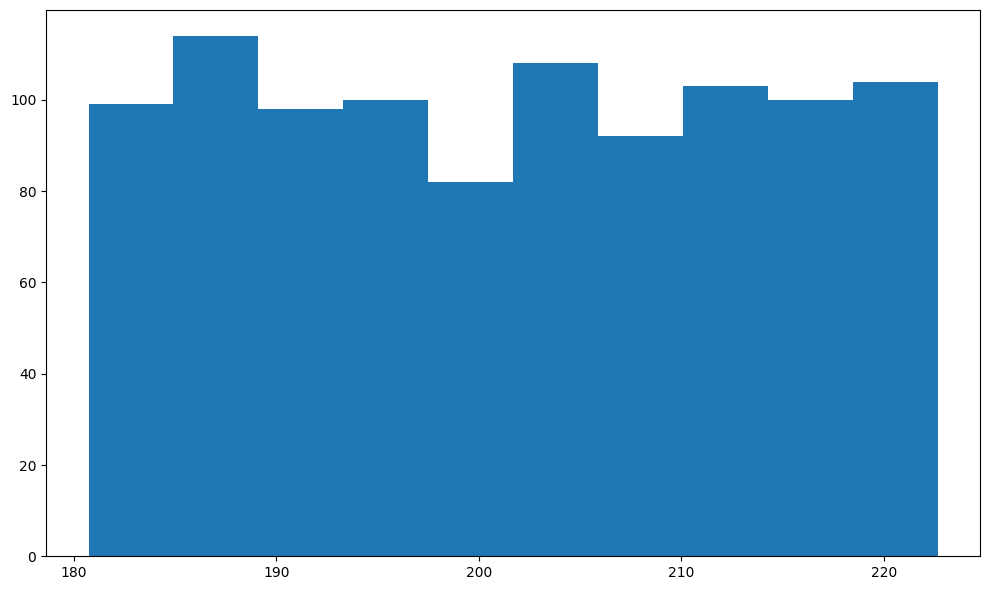

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## विश्वास अंतराल

आता आपण बेसबॉल खेळाडूंच्या वजन आणि उंचींसाठी विश्वास अंतरालाची गणना करूया. यासाठी आपण [या स्टॅकओव्हरफ्लो चर्चेतील कोड](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) वापरणार आहोत:


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## गृहितक चाचणी

आपल्या बेसबॉल खेळाडूंच्या डेटासेटमधील विविध भूमिका पाहूया:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


आपण पाहू शकतो की अंतराल एकमेकांवर आच्छादित होत नाहीत.

परिकल्पना सिद्ध करण्याचा सांख्यिकदृष्ट्या अधिक योग्य मार्ग म्हणजे **Student t-test** वापरणे:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` फंक्शनद्वारे परत केलेल्या दोन मूल्ये आहेत:
* p-value म्हणजे दोन वितरणांमध्ये समान सरासरी असण्याची शक्यता मानली जाऊ शकते. आपल्या प्रकरणात, ती खूप कमी आहे, ज्याचा अर्थ असा आहे की पहिल्या बेसमेन उंच असल्याचे समर्थन करणारे मजबूत पुरावे आहेत.
* t-value म्हणजे सामान्यीकृत सरासरी फरकाचे मध्यम मूल्य जे t-test मध्ये वापरले जाते, आणि ते दिलेल्या विश्वासार्हतेसाठी एका थ्रेशोल्ड मूल्याशी तुलना केले जाते.


## केंद्रीय मर्यादा प्रमेयासह सामान्य वितरणाचे अनुकरण

Python मधील छद्म-यादृच्छिक जनक आपल्याला एकसमान वितरण देण्यासाठी तयार केलेला आहे. जर आपल्याला सामान्य वितरणासाठी जनक तयार करायचा असेल, तर आपण केंद्रीय मर्यादा प्रमेयाचा उपयोग करू शकतो. सामान्य वितरणासाठी मूल्य मिळवण्यासाठी, आपण एकसमान-निर्मित नमुन्याचा सरासरी गणना करू.


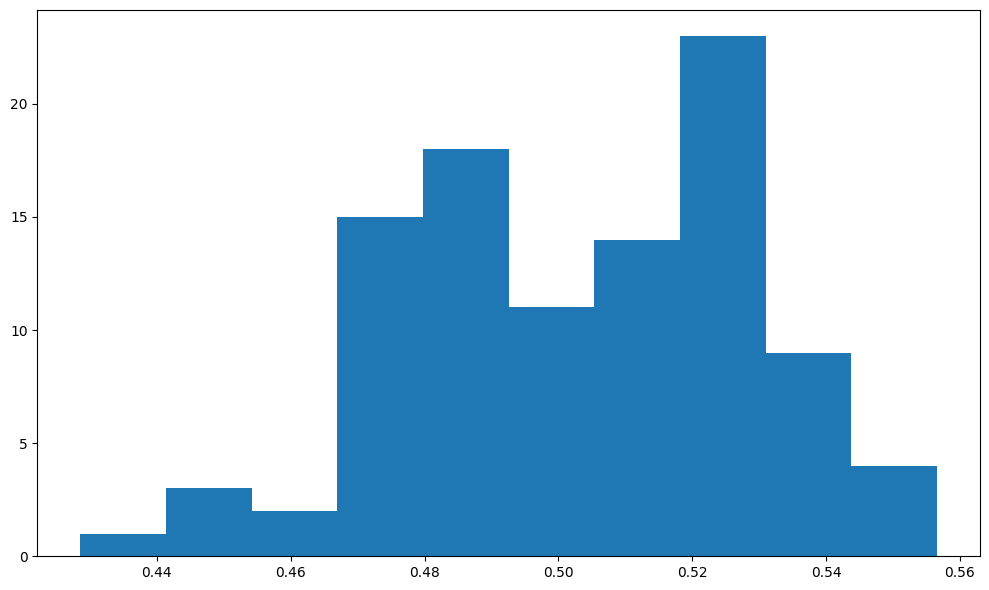

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## परस्परसंबंध आणि दुष्ट बेसबॉल कॉर्प

परस्परसंबंध आपल्याला डेटा अनुक्रमांमधील संबंध शोधण्यास मदत करतो. आपल्या खेळण्याच्या उदाहरणात, असे समजूया की एक दुष्ट बेसबॉल कंपनी आहे जी आपल्या खेळाडूंना त्यांच्या उंचीच्या आधारावर पैसे देते - खेळाडू जितका उंच असेल तितके अधिक पैसे त्याला/तिला मिळतात. समजा, $1000 ची मूळ पगार रक्कम आहे आणि उंचीच्या आधारावर $0 ते $100 पर्यंत अतिरिक्त बोनस दिला जातो. आपण MLB मधील वास्तविक खेळाडू घेऊ आणि त्यांच्या काल्पनिक पगारांची गणना करू:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


चला आता त्या अनुक्रमांची सहसंबंध आणि परस्परसंबंध मोजूया. `np.cov` आपल्याला तथाकथित **सहसंबंध मॅट्रिक्स** देईल, जो अनेक चलांमध्ये सहसंबंधाचा विस्तार आहे. सहसंबंध मॅट्रिक्स $M$ चा घटक $M_{ij}$ हा इनपुट चल $X_i$ आणि $X_j$ यांच्यातील परस्परसंबंध आहे, आणि तिरप्या मूल्ये $M_{ii}$ ही $X_{i}$ ची विचलन आहे. त्याचप्रमाणे, `np.corrcoef` आपल्याला **परस्परसंबंध मॅट्रिक्स** देईल.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


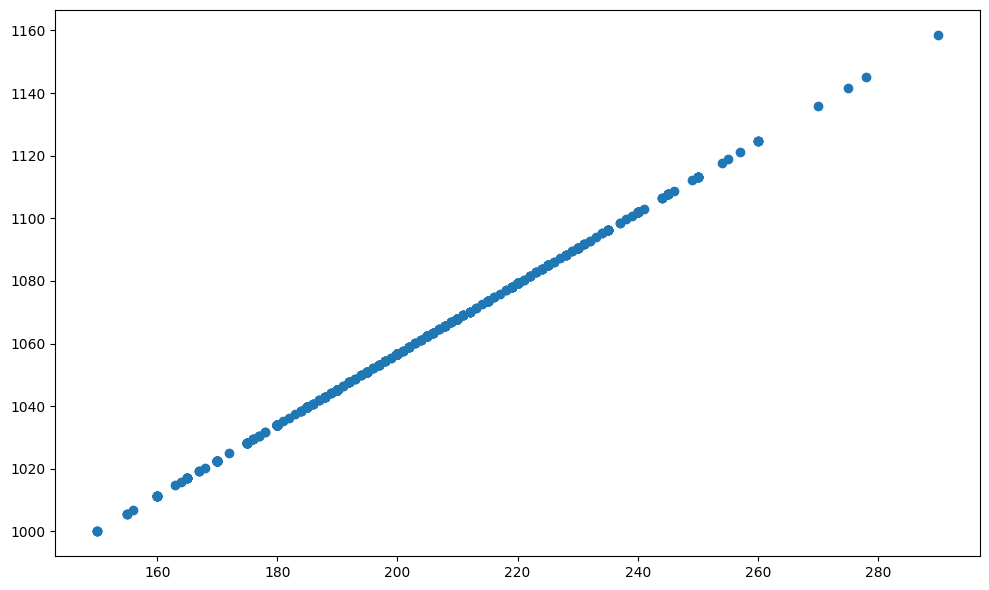

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


या प्रकरणात, सहसंबंध थोडासा कमी आहे, परंतु तो अजूनही खूप जास्त आहे. आता, संबंध आणखी कमी स्पष्ट करण्यासाठी, आपण पगारामध्ये काही यादृच्छिक चल जोडून थोडी अधिक यादृच्छिकता जोडू इच्छितो. पाहूया काय होते:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


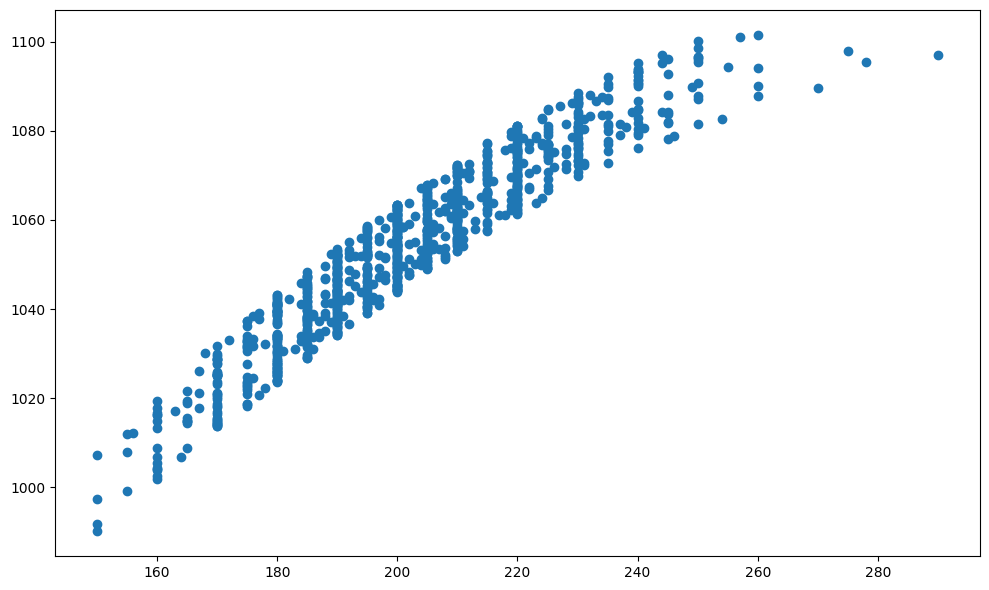

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> तुम्ही अंदाज लावू शकता का की ठिपके अशा प्रकारे उभ्या रेषांमध्ये का जुळतात?

आम्ही पगारासारख्या कृत्रिमरित्या तयार केलेल्या संकल्पनेचा आणि निरीक्षित बदलणाऱ्या *उंची* या घटकाचा परस्परसंबंध पाहिला आहे. चला आता दोन निरीक्षित घटक, जसे की उंची आणि वजन, यांच्यातही परस्परसंबंध आहे का ते पाहूया:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

दुर्दैवाने, आम्हाला कोणतेही परिणाम मिळाले नाहीत - फक्त काही विचित्र `nan` मूल्ये मिळाली. याचे कारण असे आहे की आमच्या मालिकेतील काही मूल्ये अनिर्दिष्ट आहेत, ज्यांचे प्रतिनिधित्व `nan` ने केले जाते, ज्यामुळे ऑपरेशनचा परिणाम देखील अनिर्दिष्ट होतो. मॅट्रिक्सकडे पाहिल्यास आपण पाहू शकतो की `Weight` ही समस्या निर्माण करणारी स्तंभ आहे, कारण `Height` मूल्यांमधील स्व-संबंध गणना केला गेला आहे.

> हा उदाहरण **डेटा तयारी** आणि **स्वच्छता** याचे महत्त्व दाखवतो. योग्य डेटा नसल्यास आपण काहीही गणना करू शकत नाही.

चला `fillna` पद्धत वापरून गहाळ मूल्ये भरूया आणि संबंधाची गणना करूया:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

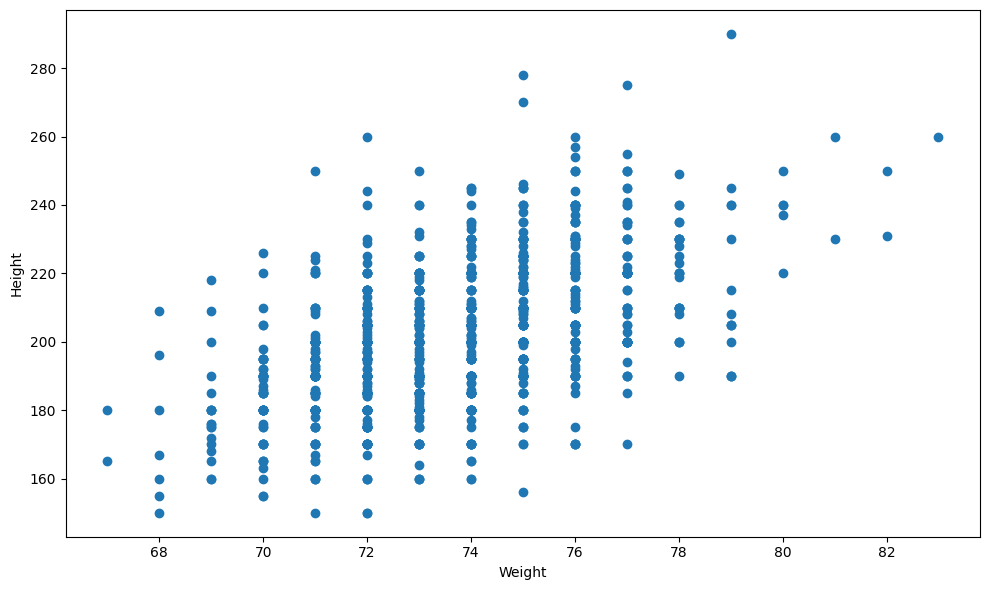

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## निष्कर्ष

या नोटबुकमध्ये आपण डेटावर मूलभूत ऑपरेशन्स कसे करायचे आणि सांख्यिकीय फंक्शन्स कसे मोजायचे हे शिकले. आता आपल्याला गणित आणि सांख्यिकीच्या ठोस साधनांचा वापर करून काही गृहीतके सिद्ध कसे करायचे आणि दिलेल्या डेटा नमुन्यावरून कोणत्याही बदलत्या घटकांसाठी विश्वास अंतर कसे मोजायचे हे माहित आहे.



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील मूळ दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी, व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवलेल्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
